In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
%matplotlib inline

In [6]:
df = pd.read_csv('kyphosis.csv')

In [7]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [8]:
df.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


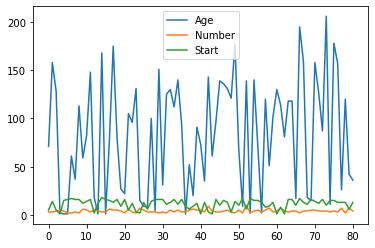

In [9]:
df.plot()

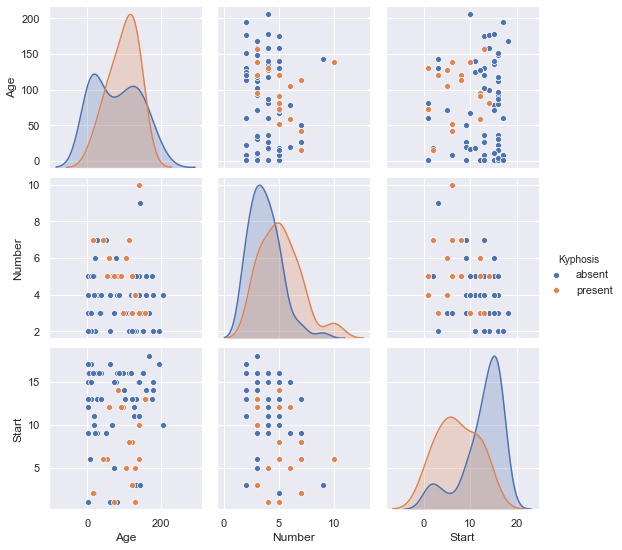

In [14]:
sns.set(style = 'darkgrid')
sns.pairplot(df,hue = 'Kyphosis')

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X = df.drop('Kyphosis',axis = 1)

In [17]:
y = df['Kyphosis']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3)

In [26]:
from sklearn.tree import DecisionTreeClassifier

In [27]:
dtree = DecisionTreeClassifier()

In [28]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [29]:
predictions = dtree.predict(X_test)

In [30]:
from sklearn.metrics import classification_report,confusion_matrix

In [31]:
print(confusion_matrix(y_test,predictions))

print('\n')

print(classification_report(y_test,predictions))

[[21  2]
 [ 1  1]]


              precision    recall  f1-score   support

      absent       0.95      0.91      0.93        23
     present       0.33      0.50      0.40         2

    accuracy                           0.88        25
   macro avg       0.64      0.71      0.67        25
weighted avg       0.90      0.88      0.89        25



In [33]:
from sklearn.ensemble import RandomForestClassifier

In [34]:
rfc = RandomForestClassifier(n_estimators = 200)

In [35]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [36]:
rfc_pred = rfc.predict(X_test)

In [37]:
rfc_pred

array(['absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent', 'present', 'absent', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent'], dtype=object)

In [39]:
print(classification_report(y_test,rfc_pred))
print('\n')
print(confusion_matrix(y_test,rfc_pred))

              precision    recall  f1-score   support

      absent       0.92      0.96      0.94        23
     present       0.00      0.00      0.00         2

    accuracy                           0.88        25
   macro avg       0.46      0.48      0.47        25
weighted avg       0.84      0.88      0.86        25



[[22  1]
 [ 2  0]]


In [42]:
df['Kyphosis'].value_counts()

absent     64
present    17
Name: Kyphosis, dtype: int64